### Исследование рынка недвижимости.

Вы работаете в агентстве недвижимости. У вас есть база данных по объявлениям сервиса Яндекс.Недвижимость. Ваша задача — исследовать данные и извлечь полезную для бизнеса информацию.

Задачи: 

 - Определить, от каких факторов больше всего зависит цена.
 - Определить, как цена зависит от дня, месяца, года продажи.
 - Определить, зависит ли цена от этажа и этажности.
 - Определить, как цена реагирует на удаленность квартиры от центра. Понять, что можно считать центром города.
 - Найти в данных прочие закономерности, представляющие интерес для бизнеса.
 
По каждой продаваемой квартире у вас есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.


### Описание полей данных
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

In [82]:
from phik import phik_matrix

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import (
    LinearSegmentedColormap,
)  # поможет расскарсить датафрейм см. ниже :)
import seaborn as sns
# Создаем кастомную цветовую карту от красного к зеленому с ограниченным количеством градаций
colors = ["red", "yellow", "green"]
n_bins = 10  # Количество градаций
cmap = LinearSegmentedColormap.from_list("red_yellow_green", colors, N=n_bins)


# Открываем файл и обнаруживаем, что разделителем является символ \t:
data = pd.read_csv('real_estate_data.csv', sep='\t')
# data.info()

# переименуем некрасивые столбцы для удобства
data.rename(columns={'cityCenters_nearest': 'center_dist',
                     'airports_nearest': 'airport_dist',
                     'parks_around3000': 'parks_3km',
                     'ponds_around3000': 'ponds_3km',
                     'first_day_exposition': 'published_date',
                     'days_exposition': 'published_days',
                     'is_apartment': 'apartment',
                     'total_images': 'images',
                     'locality_name': 'locality'
                    }, inplace=True)

In [85]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   images          23699 non-null  int64  
 1   last_price      23699 non-null  float64
 2   total_area      23699 non-null  float64
 3   published_date  23699 non-null  object 
 4   rooms           23699 non-null  int64  
 5   ceiling_height  14504 non-null  float64
 6   floors_total    23613 non-null  float64
 7   living_area     21796 non-null  float64
 8   floor           23699 non-null  int64  
 9   apartment       2775 non-null   object 
 10  studio          23699 non-null  bool   
 11  open_plan       23699 non-null  bool   
 12  kitchen_area    21421 non-null  float64
 13  balcony         12180 non-null  float64
 14  locality        23650 non-null  object 
 15  airport_dist    18157 non-null  float64
 16  center_dist     18180 non-null  float64
 17  parks_3km       18181 non-null 

,images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airport_dist,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [86]:
data.head()

,images,last_price,total_area,published_date,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality,airport_dist,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Предобработка лайт.

In [87]:
data = data.query('last_price < 60000000 & total_area < 200')
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['apartment'] = data['apartment'].fillna(0).astype(int)
data['open_plan'] = data['open_plan'].fillna(0).astype(int)
data['studio'] = data['studio'].fillna(0).astype(int)

data['published_date'] = pd.to_datetime(data['published_date'], format='%Y-%m-%dT%H:%M:%S')
data['last_price'] = data['last_price'] / 1000000
data.shape

(23436, 22)

#### Влияние факторов на цену.

In [88]:
corr_matrix = data.phik_matrix()
corr_matrix

interval columns not set, guessing: ['images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'airport_dist', 'center_dist', 'parks_3km', 'parks_nearest', 'ponds_3km', 'ponds_nearest', 'published_days']


C:\Users\RobotComp.ru\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable published_date is large: 1489. Are you sure this is not an interval variable? Analysis for pairs of variables including published_date can be slow.
  warnings.warn(


,images,last_price,total_area,published_date,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality,airport_dist,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days
images,1.000000,0.206014,0.190910,0.000000,0.089620,0.000000,0.073471,0.182727,0.073464,0.000000,...,0.143725,0.061858,0.171319,0.067069,0.040612,0.000000,0.000000,0.023465,0.000000,0.038617
last_price,0.206014,1.000000,0.753019,0.361086,0.399661,0.000000,0.092840,0.668450,0.063062,0.112486,...,0.641139,0.108854,0.132324,0.241083,0.455538,0.196045,0.097587,0.225640,0.136520,0.156609
total_area,0.190910,0.753019,1.000000,0.275285,0.664612,0.028788,0.086874,0.896852,0.066911,0.041002,...,0.543341,0.138061,0.000000,0.230141,0.394765,0.147438,0.066492,0.170888,0.104945,0.184128
published_date,0.000000,0.361086,0.275285,1.000000,0.000000,0.000000,0.000000,0.082740,0.000000,0.000000,...,0.554780,0.212191,0.000000,0.167578,0.308445,0.163212,0.000000,0.231617,0.366243,0.840285
rooms,0.089620,0.399661,0.664612,0.000000,1.000000,0.000000,0.264806,0.755495,0.132494,0.027171,...,0.168458,0.134436,0.000000,0.134445,0.235330,0.106003,0.000000,0.084102,0.043777,0.103441
ceiling_height,0.000000,0.000000,0.028788,0.000000,0.000000,1.000000,0.054400,0.010200,0.000000,0.137379,...,0.000000,0.072319,0.293874,0.003143,0.000000,0.000000,0.067267,0.024494,0.000000,0.000000
floors_total,0.073471,0.092840,0.086874,0.000000,0.264806,0.054400,1.000000,0.153772,0.608765,0.025088,...,0.292057,0.202756,0.509288,0.306604,0.375921,0.248871,0.176593,0.211631,0.193291,0.033408
living_area,0.182727,0.668450,0.896852,0.082740,0.755495,0.010200,0.153772,1.000000,0.144465,0.019726,...,0.367074,0.135511,0.250032,0.223833,0.389779,0.159195,0.059285,0.144324,0.088801,0.167907
floor,0.073464,0.063062,0.066911,0.000000,0.132494,0.000000,0.608765,0.144465,1.000000,0.000000,...,0.264606,0.159855,0.195800,0.238205,0.317552,0.160312,0.108247,0.112838,0.113967,0.034911
apartment,0.000000,0.112486,0.041002,0.000000,0.027171,0.137379,0.025088,0.019726,0.000000,1.000000,...,0.233461,0.045758,0.114585,0.051083,0.095417,0.056414,0.000000,0.055362,0.045395,0.052655


In [89]:
corr_matrix.style.background_gradient(cmap=cmap)

,images,last_price,total_area,published_date,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality,airport_dist,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days
images,1.000000,0.206014,0.190910,0.000000,0.089620,0.000000,0.073471,0.182727,0.073464,0.000000,0.035683,0.029065,0.143725,0.061858,0.171319,0.067069,0.040612,0.000000,0.000000,0.023465,0.000000,0.038617
last_price,0.206014,1.000000,0.753019,0.361086,0.399661,0.000000,0.092840,0.668450,0.063062,0.112486,0.055649,0.047181,0.641139,0.108854,0.132324,0.241083,0.455538,0.196045,0.097587,0.225640,0.136520,0.156609
total_area,0.190910,0.753019,1.000000,0.275285,0.664612,0.028788,0.086874,0.896852,0.066911,0.041002,0.392697,0.233826,0.543341,0.138061,0.000000,0.230141,0.394765,0.147438,0.066492,0.170888,0.104945,0.184128
published_date,0.000000,0.361086,0.275285,1.000000,0.000000,0.000000,0.000000,0.082740,0.000000,0.000000,0.000000,0.000000,0.554780,0.212191,0.000000,0.167578,0.308445,0.163212,0.000000,0.231617,0.366243,0.840285
rooms,0.089620,0.399661,0.664612,0.000000,1.000000,0.000000,0.264806,0.755495,0.132494,0.027171,0.107163,0.061546,0.168458,0.134436,0.000000,0.134445,0.235330,0.106003,0.000000,0.084102,0.043777,0.103441
ceiling_height,0.000000,0.000000,0.028788,0.000000,0.000000,1.000000,0.054400,0.010200,0.000000,0.137379,0.000000,0.047310,0.000000,0.072319,0.293874,0.003143,0.000000,0.000000,0.067267,0.024494,0.000000,0.000000
floors_total,0.073471,0.092840,0.086874,0.000000,0.264806,0.054400,1.000000,0.153772,0.608765,0.025088,0.073021,0.049708,0.292057,0.202756,0.509288,0.306604,0.375921,0.248871,0.176593,0.211631,0.193291,0.033408
living_area,0.182727,0.668450,0.896852,0.082740,0.755495,0.010200,0.153772,1.000000,0.144465,0.019726,0.093107,0.050013,0.367074,0.135511,0.250032,0.223833,0.389779,0.159195,0.059285,0.144324,0.088801,0.167907
floor,0.073464,0.063062,0.066911,0.000000,0.132494,0.000000,0.608765,0.144465,1.000000,0.000000,0.047733,0.052530,0.264606,0.159855,0.195800,0.238205,0.317552,0.160312,0.108247,0.112838,0.113967,0.034911
apartment,0.000000,0.112486,0.041002,0.000000,0.027171,0.137379,0.025088,0.019726,0.000000,1.000000,0.000000,0.000000,0.233461,0.045758,0.114585,0.051083,0.095417,0.056414,0.000000,0.055362,0.045395,0.052655


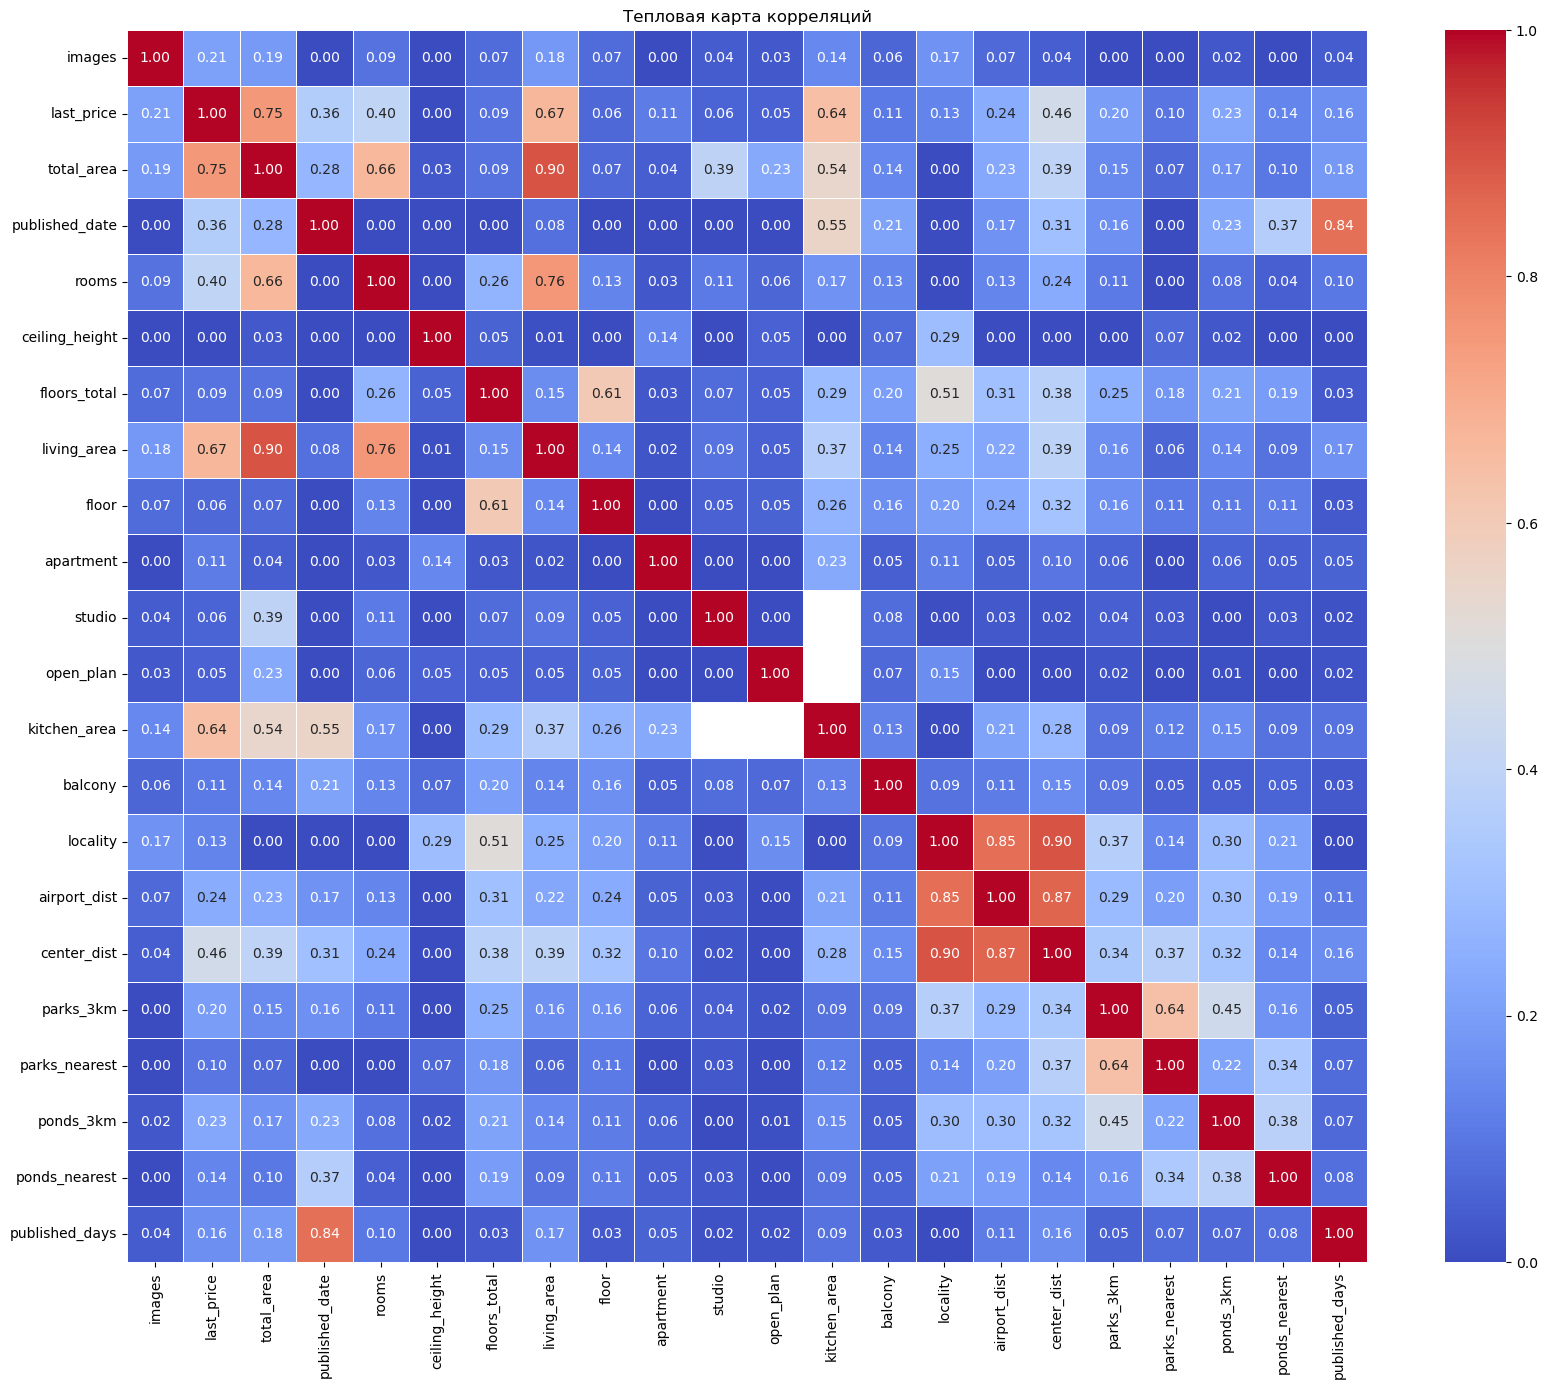

In [90]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

In [91]:
corr_matrix['last_price'].sort_values(ascending=False)

last_price        1.000000
total_area        0.753019
living_area       0.668450
kitchen_area      0.641139
center_dist       0.455538
rooms             0.399661
published_date    0.361086
airport_dist      0.241083
ponds_3km         0.225640
images            0.206014
parks_3km         0.196045
published_days    0.156609
ponds_nearest     0.136520
locality          0.132324
apartment         0.112486
balcony           0.108854
parks_nearest     0.097587
floors_total      0.092840
floor             0.063062
studio            0.055649
open_plan         0.047181
ceiling_height    0.000000
Name: last_price, dtype: float64

Цена за всю квартиру может быть не очень информативна. Отдельно исследуем цену за квм

In [92]:
#### Введем в таблицу дополнительный столбец
data['price_per_area'] = data['last_price'] / data['total_area']

In [93]:
data.phik_matrix()['price_per_area'].sort_values(ascending=False)

interval columns not set, guessing: ['images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'airport_dist', 'center_dist', 'parks_3km', 'parks_nearest', 'ponds_3km', 'ponds_nearest', 'published_days', 'price_per_area']


C:\Users\RobotComp.ru\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable published_date is large: 1489. Are you sure this is not an interval variable? Analysis for pairs of variables including published_date can be slow.
  warnings.warn(


price_per_area    1.000000
last_price        0.774985
ceiling_height    0.686102
locality          0.520720
center_dist       0.454408
total_area        0.312129
kitchen_area      0.284104
floors_total      0.232495
airport_dist      0.219892
floor             0.218744
living_area       0.191906
ponds_3km         0.181547
parks_3km         0.173639
apartment         0.160987
images            0.154424
rooms             0.135869
ponds_nearest     0.122364
parks_nearest     0.104337
balcony           0.082180
published_days    0.062082
studio            0.036358
open_plan         0.016734
published_date    0.000000
Name: price_per_area, dtype: float64

In [94]:
data_filtered = data[(data['ceiling_height'] < 3.5)]
data_filtered.phik_matrix()['ceiling_height'].sort_values(ascending=False)

interval columns not set, guessing: ['images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'airport_dist', 'center_dist', 'parks_3km', 'parks_nearest', 'ponds_3km', 'ponds_nearest', 'published_days', 'price_per_area']


C:\Users\RobotComp.ru\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable published_date is large: 1391. Are you sure this is not an interval variable? Analysis for pairs of variables including published_date can be slow.
  warnings.warn(


ceiling_height    1.000000
floors_total      0.670325
center_dist       0.410475
last_price        0.386412
total_area        0.344981
kitchen_area      0.331912
living_area       0.331332
locality          0.318547
parks_3km         0.314456
ponds_3km         0.289918
price_per_area    0.273450
rooms             0.225572
airport_dist      0.222966
floor             0.192985
balcony           0.145583
ponds_nearest     0.124052
published_date    0.111665
published_days    0.089951
parks_nearest     0.085020
apartment         0.082064
images            0.049775
studio            0.031520
open_plan         0.016517
Name: ceiling_height, dtype: float64

#### Обзор формы данных по гистограммам

Важно умметь читать гистограммы.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

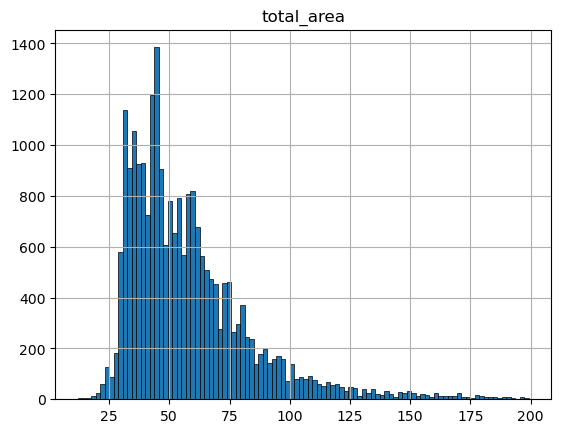

In [95]:
# нам важно научиться читать гистограммы
data.hist('total_area', bins=100, edgecolor='black', linewidth=0.5)

Так можно посмотреть распределения всех интересующих величин:

In [98]:
data.columns

Index(['images', 'last_price', 'total_area', 'published_date', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality',
       'airport_dist', 'center_dist', 'parks_3km', 'parks_nearest',
       'ponds_3km', 'ponds_nearest', 'published_days', 'price_per_area'],
      dtype='object')

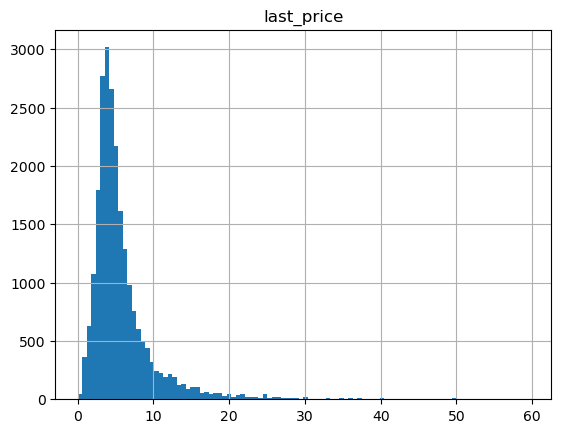

count    23436.000000
mean         5.900635
std          4.817959
min          0.012190
25%          3.400000
50%          4.600000
75%          6.690000
max         59.534892
Name: last_price, dtype: float64


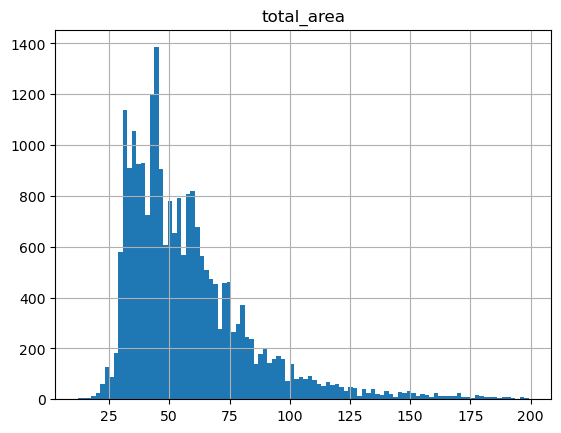

count    23436.000000
mean        58.015262
std         26.202124
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64


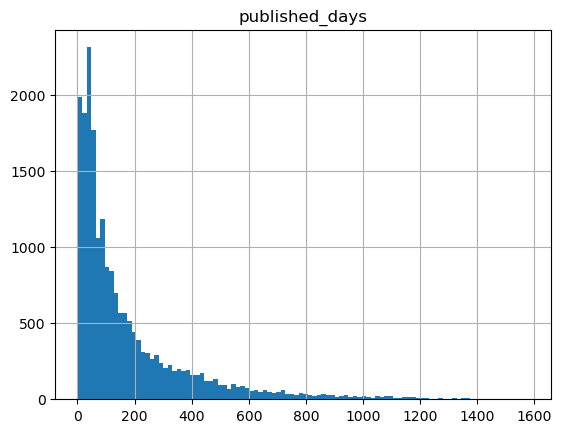

count    20314.000000
mean       179.536477
std        218.216823
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: published_days, dtype: float64


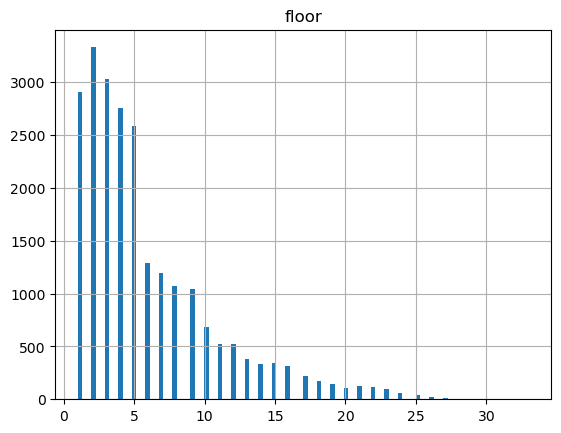

count    23436.000000
mean         5.902714
std          4.896933
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


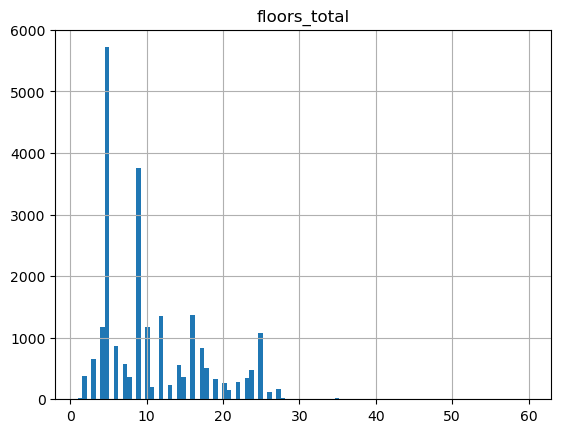

count    23351.000000
mean        10.719627
std          6.608707
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


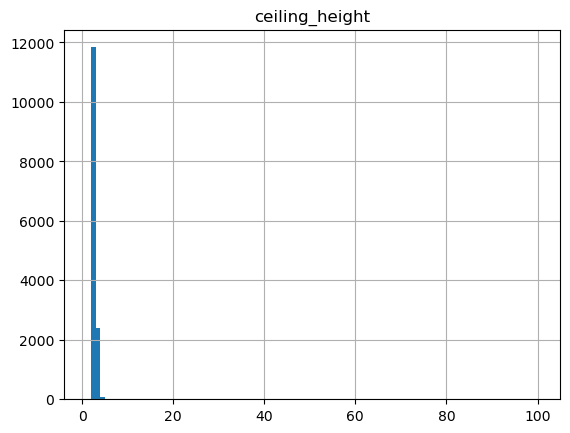

count    14335.000000
mean         2.763839
std          1.265075
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [96]:
for column in ['last_price', 'total_area', 'published_days', 'floor', 'floors_total',  'ceiling_height']:
        data.hist(column, bins=100)
        plt.show()
        print(data[column].describe())

Посмотрим подробнее на продолжительность размещения объявления

array([[<Axes: title={'center': 'published_days'}>]], dtype=object)

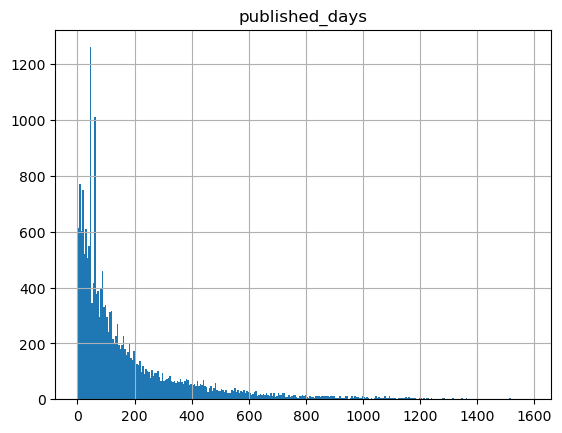

In [102]:
data.hist('published_days', bins=300)
#plt.xlim(0, 299) 

In [100]:
data['published_days'].value_counts().head(10)

45.0    879
60.0    538
7.0     233
30.0    207
90.0    192
4.0     176
3.0     158
5.0     151
14.0    144
9.0     141
Name: published_days, dtype: int64

 80 % работы аналитика - разумом, а не кодом ;)

На 45-й и 60-й день снимается много объявлний.

Можно строить на одних осях гистограмму + boxplot 

In [106]:
axes[1]

<Axes: xlabel='Цена'>

In [1]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6), sharex=True)
axes = axes.flatten()
# Гистограмма
sns.histplot(data=data, x="last_price", bins=300, ax=axes[1])
axes[0].set_title("Гистограмма цены")
axes[0].set_ylabel("Частота")

# Boxplot
sns.boxplot(x=data["last_price"], ax=axes[6])
axes[1].set_xlabel("Цена")
axes[1].set_ylabel("")

#gridspec_kw={'height_ratios': [3, 1]}

NameError: name 'plt' is not defined

Гистограмма и boxplot сущностно — одно и то же.

#### Этаж 

Этаж стоит разделить на группы — первый, последний, другой

In [ ]:
# через функцию 
def floor_pos(row):
    floor = row['floor']
    if floor == 1:
        return 'Первый'
    if floor == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [110]:
data['floor_group'] = 'Другой'
data

,images,last_price,total_area,published_date,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,locality,airport_dist,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days,price_per_area,floor_group
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.120370,Другой
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.6,1,0,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.082921,Другой
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.3,4,0,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.092786,Другой
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.0,13,0,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.100000,Другой
5,10,2.890,30.40,2018-09-10,1,NaN,12.0,14.4,5,0,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.095066,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,0,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,0.072491,Другой
23695,14,3.100,59.00,2018-01-15,3,NaN,5.0,38.0,4,0,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.052542,Другой
23696,18,2.500,56.70,2018-02-11,2,NaN,3.0,29.7,1,0,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044092,Другой
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,NaN,12,0,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,0.149511,Другой


In [111]:
data.loc[data['floor'] == 1, 'floor_group']

1        Другой
14       Другой
16       Другой
24       Другой
28       Другой
          ...  
23665    Другой
23673    Другой
23680    Другой
23696    Другой
23698    Другой
Name: floor_group, Length: 2902, dtype: object

In [112]:
# через индексацию
data['floor_group'] = 'Другой'
data.loc[data['floor'] == 1, 'floor_group'] = 'Первый'
data.loc[data['floor'] == data['floors_total'], 'floor_group'] = 'Последний'

In [114]:
mean_prices = data.groupby('floor_group')['price_per_area'].mean()
mean_prices

floor_group
Другой       0.102089
Первый       0.081793
Последний    0.088975
Name: price_per_area, dtype: float64

In [116]:
mean_prices.index

Index(['Другой', 'Первый', 'Последний'], dtype='object', name='floor_group')

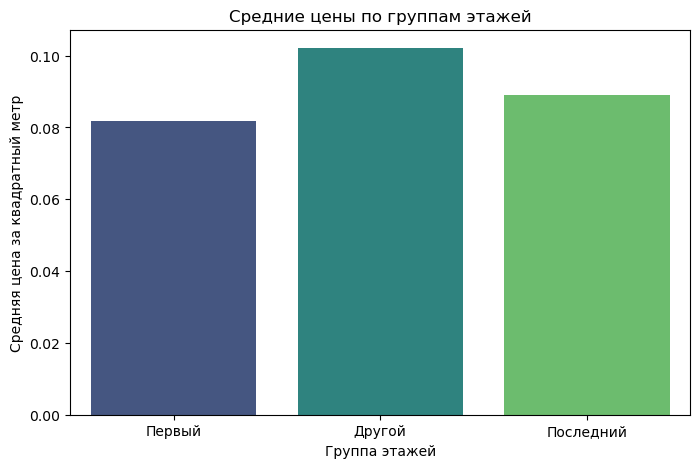

In [115]:
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_prices.index, y=mean_prices, order=['Первый', 'Другой', 'Последний'], palette='viridis')

# Добавляем подписи
plt.xlabel('Группа этажей')
plt.ylabel('Средняя цена за квадратный метр')
plt.title('Средние цены по группам этажей')
plt.show()

Изучим расстояние до центра

Text(0.5, 0, 'Расстояние до центра, м')

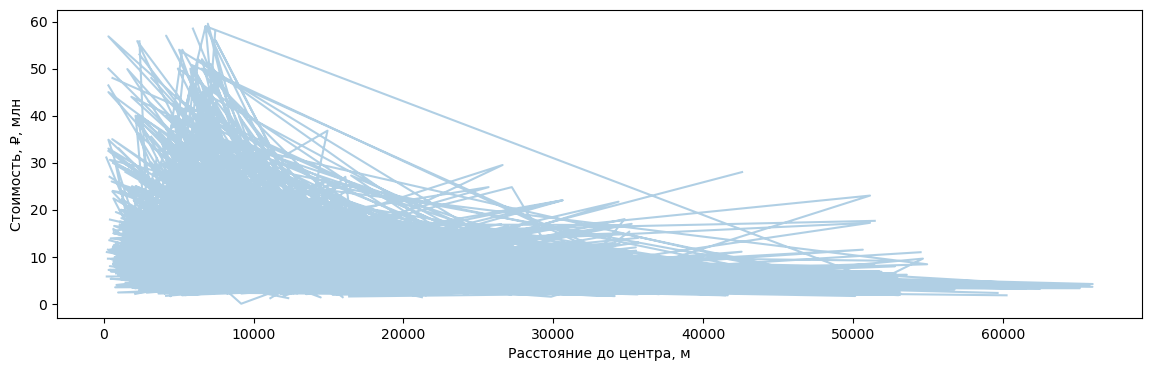

In [117]:
plt.figure(figsize=(14, 4))
plt.plot('center_dist', 'last_price',
            data=data, alpha=0.35)
plt.ylabel('Стоимость, ₽, млн')
plt.xlabel('Расстояние до центра, м')

Text(0.5, 0, 'Расстояние до центра, м')

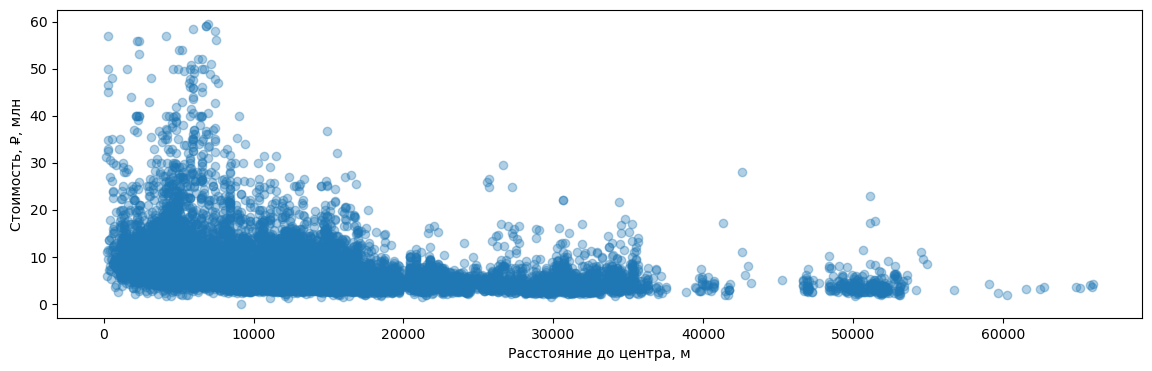

In [118]:
plt.figure(figsize=(14, 4))
plt.scatter('center_dist', 'last_price',
            data=data, alpha=0.35)
plt.ylabel('Стоимость, ₽, млн')
plt.xlabel('Расстояние до центра, м')

Стоит сгруппировать по километрам

In [119]:
data['center_dist_km'] = round(data['center_dist'] / 1000)

In [121]:
data.groupby('center_dist_km')['last_price'].mean()

center_dist_km
0.0     22.088589
1.0     12.455052
2.0     12.282610
3.0     10.067502
4.0     10.787537
          ...    
61.0     3.200000
62.0     3.200000
63.0     3.600000
65.0     3.475000
66.0     3.933333
Name: last_price, Length: 61, dtype: float64

<Axes: xlabel='center_dist_km'>

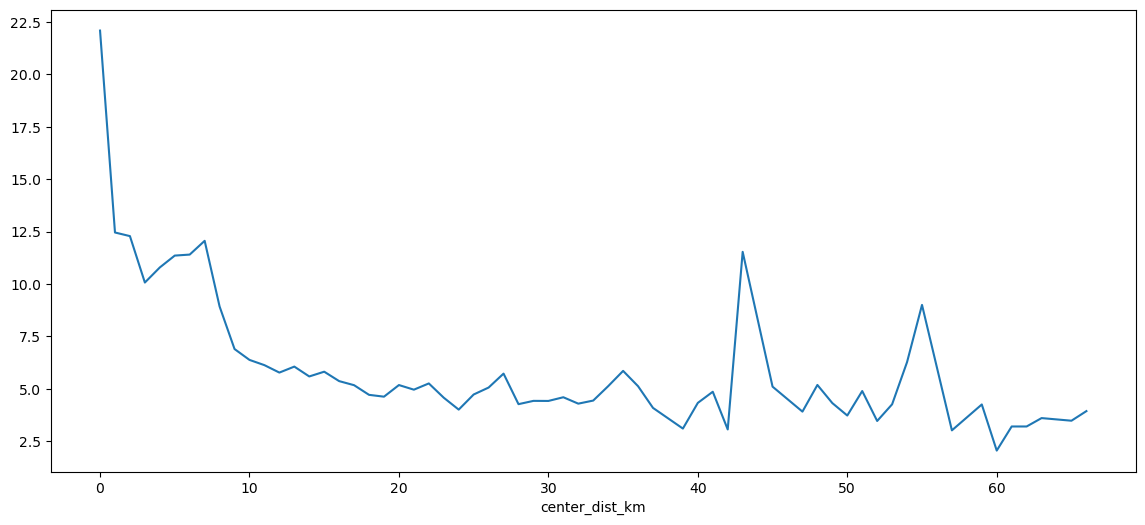

In [122]:
# быстрый способ
plt.figure(figsize=(14, 6))
data.groupby('center_dist_km')['last_price'].mean().plot()

Text(0.5, 1.0, 'Средняя цена в зависимости от расстояния до центра')

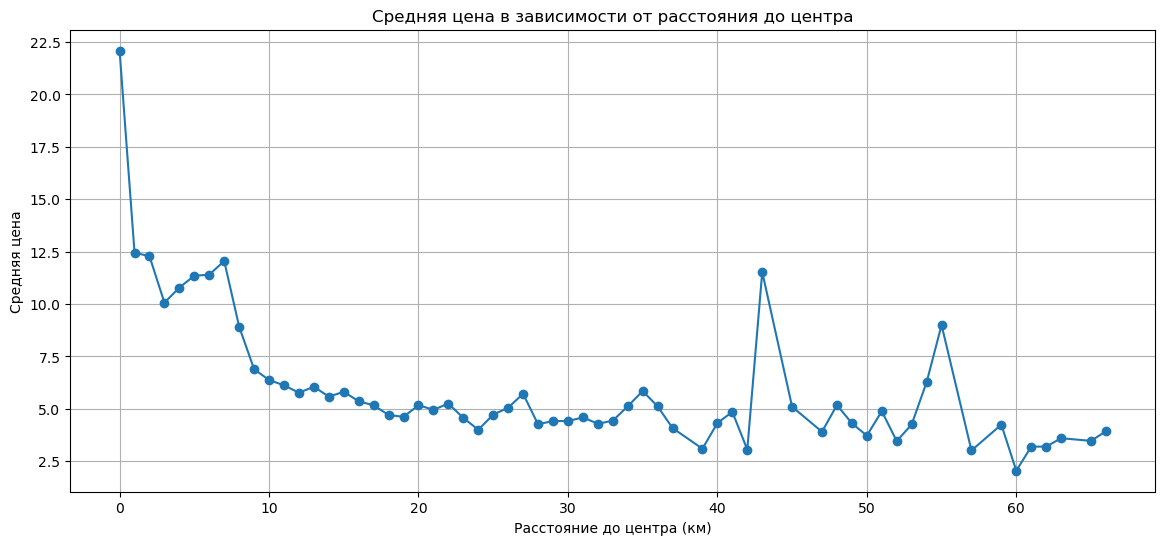

In [123]:
# красивый способ
plt.figure(figsize=(14, 6))
data.groupby('center_dist_km')['last_price'].mean().plot(grid=True, marker='o', linestyle='-')

plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена')
plt.title('Средняя цена в зависимости от расстояния до центра')

Что считаем центром?

Центром считается территория до 9 км.

In [125]:
data

,images,last_price,total_area,published_date,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,center_dist,parks_3km,parks_nearest,ponds_3km,ponds_nearest,published_days,price_per_area,floor_group,center_dist_km,is_center
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,16028.0,1.0,482.0,2.0,755.0,NaN,0.120370,Другой,16.0,False
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.6,1,0,...,18603.0,0.0,NaN,0.0,NaN,81.0,0.082921,Первый,19.0,False
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.3,4,0,...,13933.0,1.0,90.0,2.0,574.0,558.0,0.092786,Другой,14.0,False
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.0,13,0,...,8098.0,2.0,112.0,1.0,48.0,121.0,0.100000,Другой,8.0,True
5,10,2.890,30.40,2018-09-10,1,NaN,12.0,14.4,5,0,...,NaN,NaN,NaN,NaN,NaN,55.0,0.095066,Другой,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,0,...,4232.0,1.0,796.0,3.0,381.0,NaN,0.072491,Другой,4.0,True
23695,14,3.100,59.00,2018-01-15,3,NaN,5.0,38.0,4,0,...,NaN,NaN,NaN,NaN,NaN,45.0,0.052542,Другой,NaN,False
23696,18,2.500,56.70,2018-02-11,2,NaN,3.0,29.7,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.044092,Первый,NaN,False
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,NaN,12,0,...,10364.0,2.0,173.0,3.0,196.0,602.0,0.149511,Другой,10.0,False


In [124]:
data['is_center'] = data['center_dist_km'] <= 9

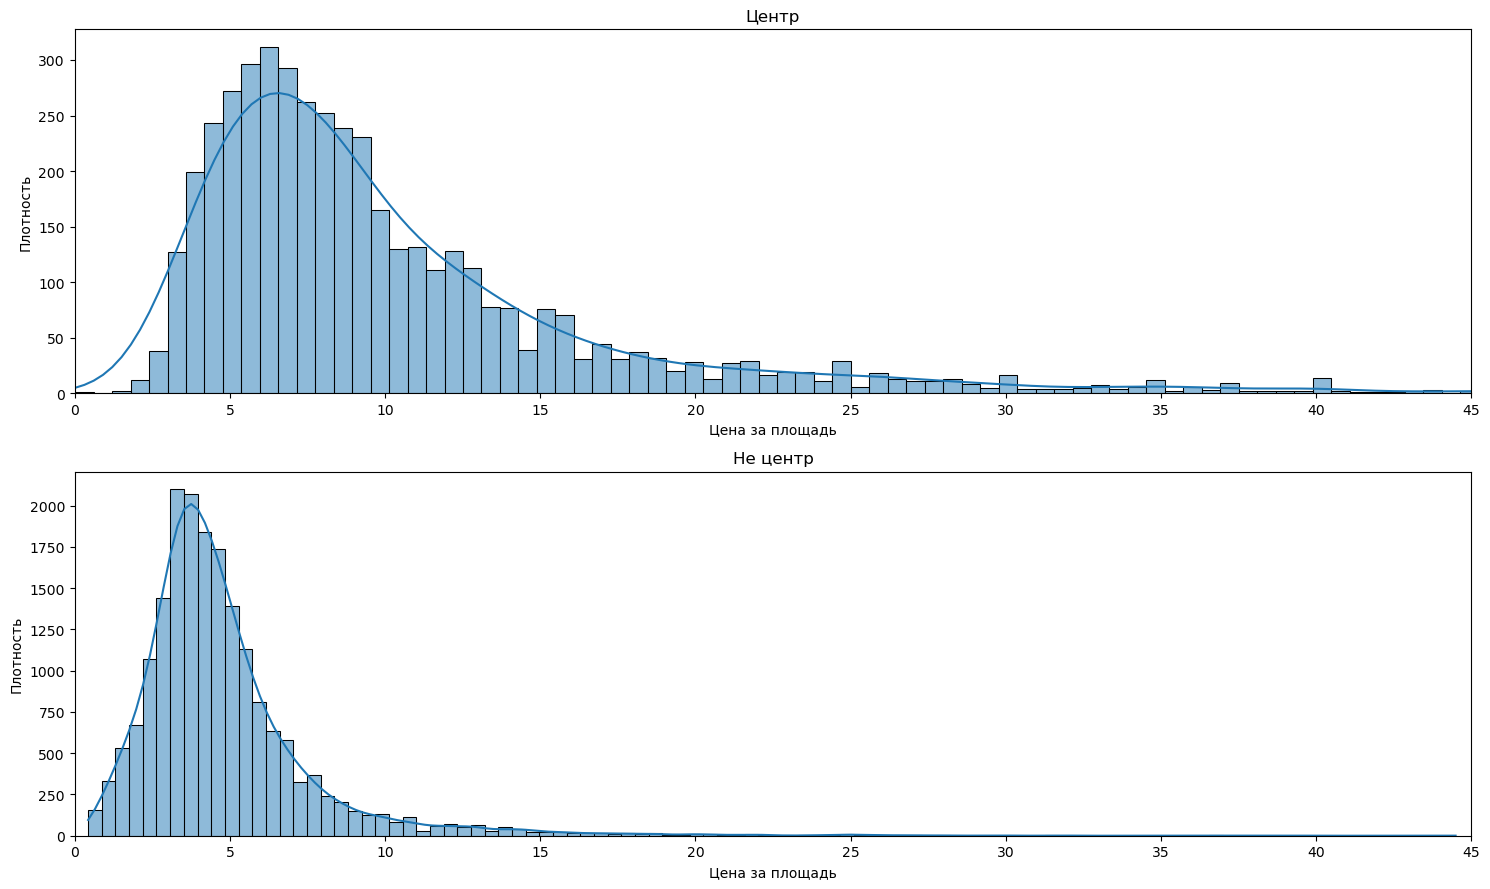

In [128]:
# Создаем два подграфика
fig, axes = plt.subplots(2, 1, figsize=(15, 9))  # 1 строка, 2 столбца

# Гистограмма для квартир в центре
sns.histplot(data=data[data['is_center'] == True], x='last_price', kde=True, ax=axes[0], bins=100)
axes[0].set_title('Центр')
axes[0].set_xlabel('Цена за площадь')
axes[0].set_ylabel('Плотность')

# Гистограмма для квартир не в центре
sns.histplot(data=data[data['is_center'] == False], x='last_price', kde=True, ax=axes[1],  bins=100)
axes[1].set_title('Не центр')
axes[1].set_xlabel('Цена за площадь')
axes[1].set_ylabel('Плотность')

axes[0].set_xlim(0, 45)
axes[1].set_xlim(0, 45)

plt.tight_layout()  # Чтобы графики не перекрывались

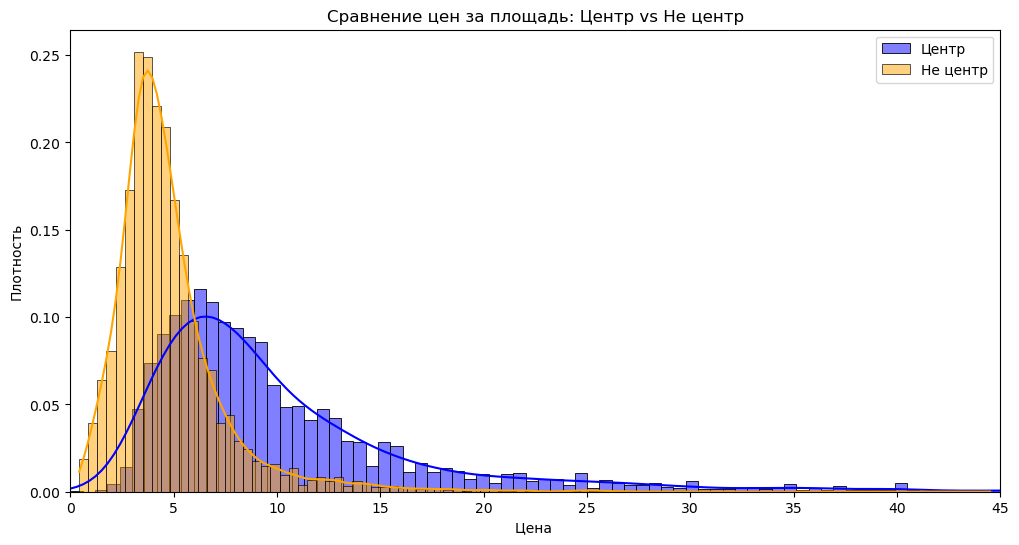

In [130]:
plt.figure(figsize=(12, 6))

# Накладывающиеся гистограммы на одном графике
sns.histplot(data=data[data['is_center'] == True], x='last_price', kde=True, color='blue', label='Центр', stat='density', bins=100)
sns.histplot(data=data[data['is_center'] == False], x='last_price', kde=True, color='orange', label='Не центр', stat='density', bins=100)

plt.title('Сравнение цен за площадь: Центр vs Не центр')
plt.xlabel('Цена ')
plt.ylabel('Плотность')
plt.xlim(0, 45)
plt.legend()

---

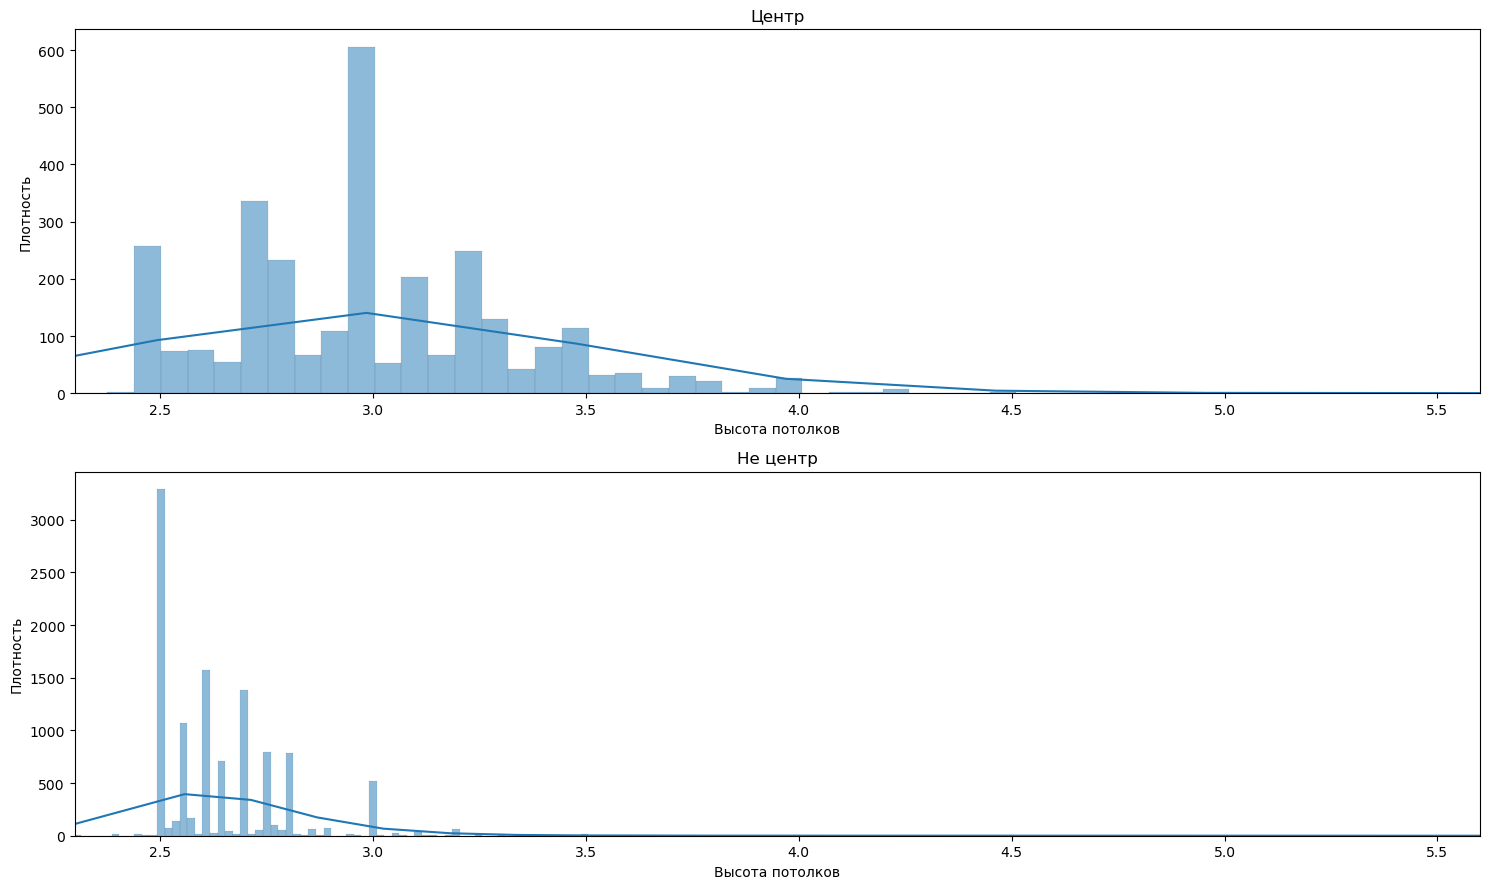

In [131]:
# Создаем два подграфика
fig, axes = plt.subplots(2, 1, figsize=(15, 9))  # 1 строка, 2 столбца

# Гистограмма для квартир в центре
sns.histplot(data=data[data['is_center'] == True], x='ceiling_height', kde=True, ax=axes[0])
axes[0].set_title('Центр')
axes[0].set_xlabel('Высота потолков')
axes[0].set_ylabel('Плотность')

# Гистограмма для квартир не в центре
sns.histplot(data=data[data['is_center'] == False], x='ceiling_height', kde=True, ax=axes[1])
axes[1].set_title('Не центр')
axes[1].set_xlabel('Высота потолков')
axes[1].set_ylabel('Плотность')

axes[0].set_xlim(2.3, 5.6)
axes[1].set_xlim(2.3, 5.6)

plt.tight_layout()  # Чтобы графики не перекрывались

Посмотрим на тренд цен по годам

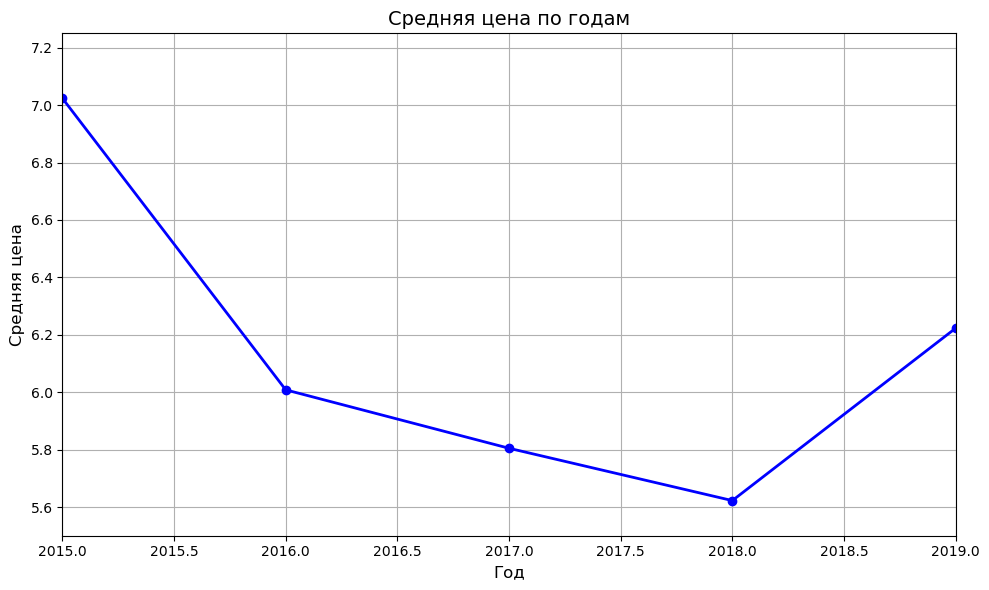

In [133]:
data['published_date'] = pd.to_datetime(data['published_date'])

# Извлекаем год из столбца 'published_date'
data['year'] = data['published_date'].dt.year

# Группируем по годам и вычисляем среднюю цену
avg_price_by_year = data.groupby('year')['last_price'].mean()

# Строим линейный график
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='b', linestyle='-', linewidth=2)

# Настройки графика
plt.title('Средняя цена по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.grid(True)
plt.xlim(2015, 2019)
plt.ylim(5.5, 7.25)
plt.tight_layout()

In [134]:
# Извлекаем месяц и день недели из 'published_date'
data['month'] = data['published_date'].dt.month
data['weekday'] = data['published_date'].dt.dayofweek

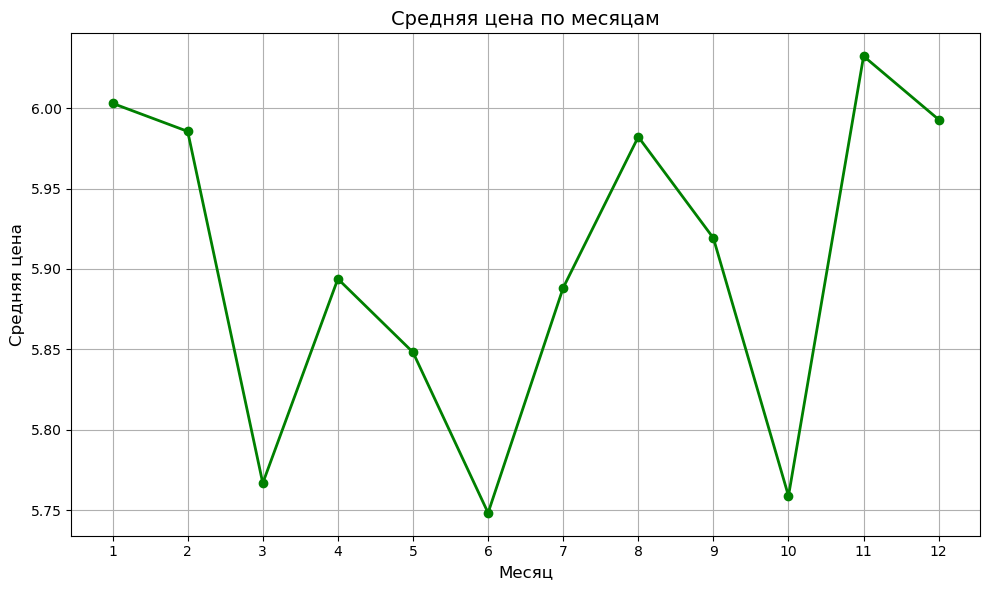

In [135]:
# Группируем по месяцам и вычисляем среднюю цену
avg_price_by_month = data.groupby('month')['last_price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_month.index, avg_price_by_month.values, marker='o', color='g', linestyle='-', linewidth=2)

# Настройки графика
plt.title('Средняя цена по месяцам', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 13))  # Чтобы отображались все месяца
plt.tight_layout()

# Показываем график
plt.show()


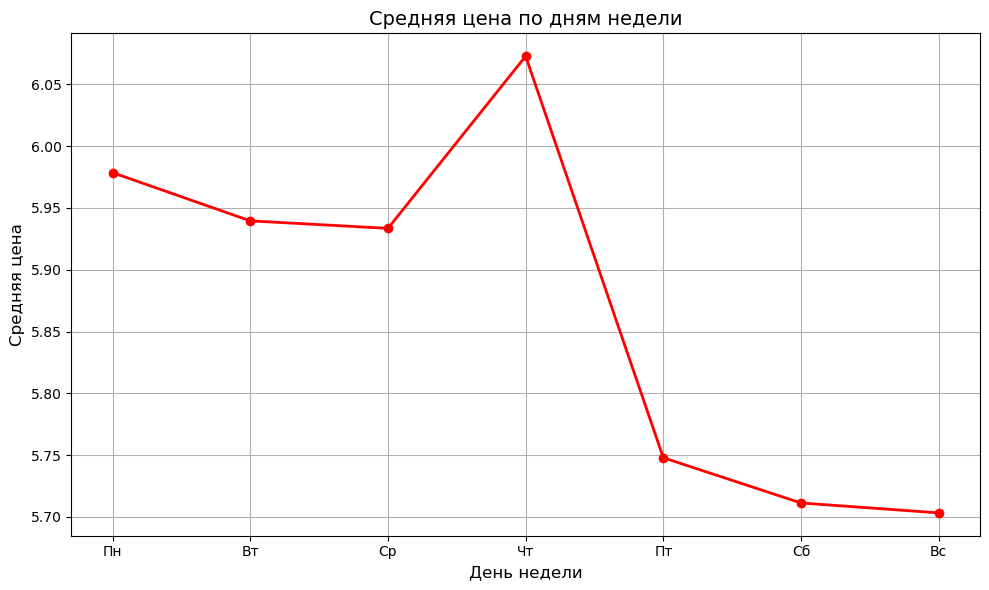

In [136]:
# Группируем по дням недели и вычисляем среднюю цену
avg_price_by_weekday = data.groupby('weekday')['last_price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_weekday.index, avg_price_by_weekday.values, marker='o', color='r', linestyle='-', linewidth=2)

# Настройки графика
plt.title('Средняя цена по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])  # Переименовываем дни недели
plt.tight_layout()

# Показываем график
plt.show()


#### Выводы

Было проведено исследование рынка недвижимости в Санкт_петербурге с 2014 по 2017 годы. Данные представляли собой 20 000 объявлений сервиса Яндекс.Недвижимость. Основной задачей исследования было выявление корреляции между ценой и прочими параметрами квартир.

1. Цена квартиры слишком сильно зависит от площади, поэтому при анализе корреляций исследовалась цена за кв.м. Больше всего цена метра коррелирует с высотой потолков (возможно влиение третьих факторов), населенным пунктом, расстоянием до центра. Наименьшие корреляции выявлены с открытой планировкой, с тем, является ли квартира сутдией и количеством балконов.
2. - Выявлено падение средней цены продажи с 7 млн в 2015-м году до 5.6. млн в 2018-м году. В 2019-м году цена снова показала рост. 
   - Сезонности не выявлено.
   - Продажи в конце недели цена показывают примерно на 5% более низкую цену по сравнению с буднями. Необходимо подтверждение гипотезы стат. тестом.
3. Первый и последний этажи продаются дешевле прочих, при этом первый дешевле последнего.
4. Центром города можно считать вкартиры удаленностью до 9 км. Дальнейшее удаление неначительно влияет на цену.
5. В данных анномально много объявлений, снятых на 45-й и 60-й день. Возможно, они сняты системой автоматически, как неактивные или фрод-объявления. 

#### Рекомендации

1. Учитывайте влияние этажности:

 - При оценке квартиры на первом или последнем этаже стоит закладывать дисконт (особенно для первого). Однако можно компенсировать это другими параметрами (например, ремонтом или улучшениями).

2. Фотографии и публикация объявлений в начале недели:

 - Размещения ближе к выходным связаны с более низкой ценой продажи, следовательно размещение или продвижение лучше делать в начале недели.

3. Для квартир в пределах 9 км от центра акцентируйте "центральность":

 - Даже при удаленности в 8-9 км, если это в пределах круга "центра", используйте это в описании — эти квартиры все еще можно считать центром.
 
